### Exploratory Data Analysis (EDA) for Brent Crude Oil Price Time Series


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
import os
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))

data_path= os.path.join(BASE_DIR, "data","raw","brent_daily_price.csv" )
df=pd.read_csv(data_path)

In [3]:
df.head()

,Date,Price
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63


In [4]:
df.columns=(df.columns
            .astype(str)
            .str.strip()
            .str.lower()
            .str.replace(" ","_")
            )

This step standardizes the dataset’s column names into a clean and consistent format.  
It removes extra spaces, converts all names to lowercase, and replaces spaces with underscores.  
This improves code readability, prevents naming errors, and follows industry best practices.


In [5]:
df.head()

,date,price
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63


In [6]:
df["date"]=pd.to_datetime(df["date"], format="mixed")

In [7]:
df.head()

,date,price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [8]:
df=df.sort_values("date")
df=df.set_index("date")
df.head()

,price
date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [9]:
df.index.inferred_freq

In [10]:
df=df.asfreq("D")
df.isna().sum()

price    4312
dtype: int64

This step enforces a daily (`D`) time frequency on the dataset, ensuring a continuous time index.  
Missing dates are explicitly created and their corresponding values are marked as `NaN`.  
This is essential for time-series models, which require regular time intervals.


In [11]:
df['price'] = df['price'].interpolate(method='time')
df.isna().sum()

price    0
dtype: int64

In [12]:
split_date = df.index[int(len(df) * 0.8)]
split_date

Timestamp('2018-04-21 00:00:00')

In [13]:
train=df.loc[df.index<= split_date]
val=df.loc[df.index>split_date]

print(train.shape, val.shape)
             

(11295, 1) (2823, 1)


In [17]:
last_train_price= train["price"].iloc[-1]
last_train_price

np.float64(74.59333333333333)

In [19]:
val.loc[:,'naive_forecast']=last_train_price
val.head()

,price,naive_forecast
date,,
2018-04-22,74.566667,74.593333
2018-04-23,74.540000,74.593333
2018-04-24,75.860000,74.593333
2018-04-25,73.790000,74.593333
2018-04-26,75.390000,74.593333


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(val['price'], val['naive_forecast'])
rmse=  np.sqrt(mean_squared_error(val['price'], val['naive_forecast']))

mae, rmse

(13.189223048766088, np.float64(18.253829966184856))

### Visualise baseline forecast 

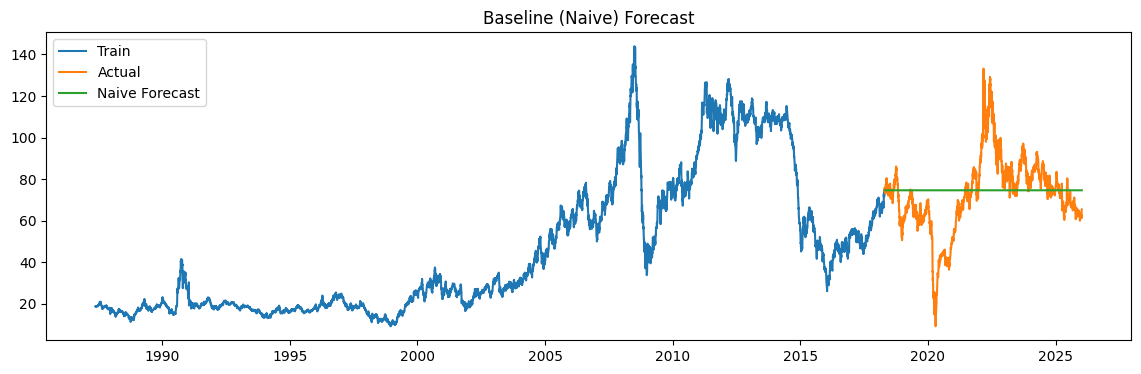

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.plot(train.index, train['price'], label='Train')
plt.plot(val.index, val['price'], label='Actual')
plt.plot(val.index, val['naive_forecast'], label='Naive Forecast')
plt.legend()
plt.title("Baseline (Naive) Forecast")
plt.show()

In [25]:
processed_path = os.path.join(
    BASE_DIR,
    "data",
    "processed",
    "brent_daily_clean.csv"
)

df.to_csv(processed_path)
processed_path

'd:\\AI_ML\\brent-oil-price-time-series-forecasting\\data\\processed\\brent_daily_clean.csv'

### EDA Conclusion

The Brent crude oil price data was explored and transformed into a clean, continuous time series.  
The datetime column was standardized, parsed, and set as the index, ensuring correct temporal ordering and daily frequency.  
A naive baseline forecasting model was implemented to establish a performance benchmark, providing a reference point for evaluating more advanced models such as ARIMA and LSTM.